# Testing Envelopes on Data Samples

In [1]:
# Some useful modules for notebooks
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['figure.figsize'] = [10, 6]
# mpl.rcParams['figure.dpi'] = 300

from tqdne.conf import DATASETDIR
import numpy as np
from tqdne.conf import Config
from tqdne.dataset import WaveformDataset
from tqdne.representations import GlobalMaxEnvelope, CenteredMaxEnvelope
config = Config()

/users/fmachado/.cache/pypoetry/virtualenvs/tqdne-h7mN2Kd5-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/users/fmachado/.cache/pypoetry/virtualenvs/tqdne-h7mN2Kd5-py3.11/lib/python3.11/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
path_train = config.datasetdir / Path(config.data_upsample_train)
print(path_train)
envelope = CenteredMaxEnvelope(config)
train_dataset = WaveformDataset(path_train, envelope, reduced=1024)

/users/fmachado/data/japan/data_upsample_train.h5


In [4]:
s_orig = train_dataset.waveform[0]
s_transf = train_dataset[0]["high_res"]

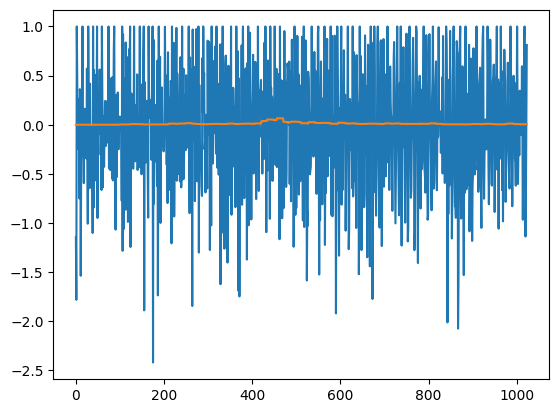

In [18]:
plt.plot(s_transf[1])
plt.plot(10 ** s_transf[0])

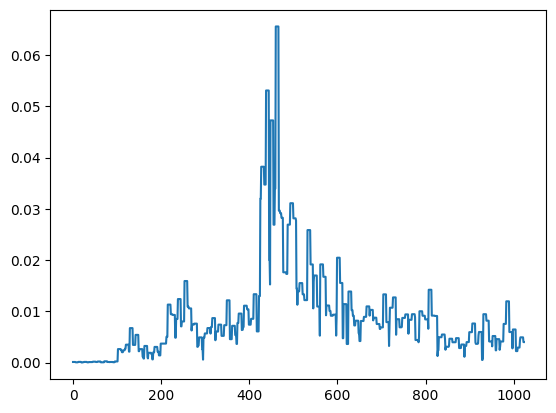

In [7]:
from tqdne.wfdataset import centered_max


s = centered_max(s_orig.reshape(-1), 7).reshape(-1)
plt.plot(s)